## Citation

#### Graves, A., Fernández, S., Gomez, F., & Schmidhuber, J. (2006). Connectionist Temporal Classification: Labelling Unsegmented Sequence Data with Recurrent Neural Networks. Proceedings of the 23rd International Conference on Machine Learning (ICML), 369–376. https://www.cs.toronto.edu/~graves/icml_2006.pdf

#### This notebook is a personal explanation and walkthrough of the paper Connectionist Temporal Classification: Labelling Unsegmented Sequence Data with Recurrent Neural Networks. All credit for the original research goes to the authors listed above.

#### Unless otherwise noted, all figures in this notebook are either original or sourced from Graves et al., 2006 – Connectionist Temporal Classification: Labelling Unsegmented Sequence Data with Recurrent Neural Networks.

# Introduction
#### Sequence labelling tasks like transcribing words from audio is a hard task because the input is noisy and unsegmened. Recurrent neural networks (RNNs) can do these tasks but they require pre-segmented training data, and post-processing to training the output into label sequences. To solve this issue, Connectionist Temporal Classification (CTC) is used.

#### The task of labelling unsegmented data sequences is known as temporal classification. The use of RNN for labelling unsegmented data sequence is known as Connectionist Temporal Classification (CTC). The independent labelling of each time step (frame) of the input sequence is known as framwise classification.

# Temporal Classification
#### S is the training dataset consisting of pairs(x, z) where x ∈ X = (R^m)* is the input sequence space consisting of real valued m-dimensional vectors over time and z ∈ Z = L* is the set of all sequences over a finite label alphabet L.

#### Each training pair (x, z) consists of input sequence x = (x1, x2, ... , x_T) of length T, and a target label sequence z = (z1, z2, ..., z_U) where U <= T.

#### Temporal Classification problem is to learn a classifier h:X->Z mapping input sequenecs to label sequences, minimizing a task-specific loss over unseen data.

# Label Error Rate (LER) - Evaluation Metric
#### Given a classifier h and test dataset S', LER is the normalized sum of edit distance between predicted and true label sequences.

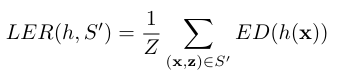

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/LER.png')

#### Edit Distance (ED) is the minimum number of insertions, substitutions and deletions required to change sequence p into sequence q.

# Connectionist Temporal Classification:
# From Outputs to Labelings

#### A CTCnetwork has a softmax layer having |L| + 1 units, where |L| is the number of true labels and the extra unit is for a blank symbol. At each timestep t, the networks outputs a probability distribution over this extended alphabet L' = L + blank.

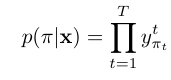

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/conditional probability.png')

#### A path π is a sequence over the extended alphabet, and the conditional probability p(π|x) is the product of the corresponding network output probabilities across time

#### The many-to-one mapping (B) is the paths by removing blanks and repeating labels. This is the valid label sequence of length <= T.

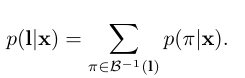

In [3]:
%matplotlib inline
from IPython.display import Image
Image('Images/probability of choosing paths with label l.png')

#### The probability of choosing label l given an input sequence x is the sum of all the paths that map to l.

#### For example: Let T=3 (3 time frames), L = {A, B}. L' or the extended alphabet is |L| + blank. Hence, L' = {A, B, blank}

#### Assume the RNN outputs at each time step is:
#### t = 1: [A=0.1, B=0.6, blank=0.3]
#### t = 2: [A=0.7, B=0.2, blank=0.1]
#### t = 3: [A=0.4, B=0.3, blank=0.3]

#### Possible paths that lead to sequence BA are:
#### π_1 = (B, A, A) = 0.6 * 0.7 * 0.4 = 0.168
#### π_2 = (blank, B, A) = 0.3 * 0.2 * 0.4 = 0.024
#### π_3 = (B, blank, A) = 0.6 * 0.1 * 0.4 = 0.024
#### π_4 = (B, A, blank) = 0.6 * 0.7 * 0.3 = 0.126
#### The paths will be BA if we remove blanks and repeating labels

# Inference (Decoding)
#### There are 2 types of decoding:
#### a) Best Path Decoding: Approximate by choosing the most probable label at each frame.
#### b) Prefix Search Decoding: Recursive forward-backward inspired search

# CTC Forward Backward Algorithm
#### Challenge is that there are many possible paths to align label sequence with the input frames. Summing over all the paths is computationally expensive.
#### Hence, forward-backward algorithm is used. It can be solved using dynamic programming approach. It computes probabilities in a recursive way.

#### l = (l1, l2, ..., l_U) is the target label sequence, and T is the length of the input sequence. l' is defined to accomodate blanks at the beginning, end, and between every pair of labels. The length l' = 2*U + 1.

#### Th forward variable, α_t(s) is the total probability of all the paths up to time t.

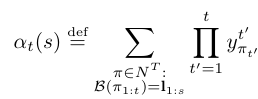

In [4]:
%matplotlib inline
from IPython.display import Image
Image('Images/Forward Variable.png')

#### The backward variable, β_t(s) is the total probability from time t till the end of the sequence (T).

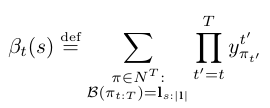

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/Backward Variable.png')

#### With these variables, recursion can be formed. Before that, we must initialize the variables

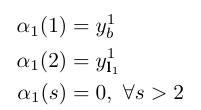

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/Initialization.png')

#### Given l' = (blank, l1, blank, l2, blank, ...), α_1(s) gives the probabilities of aligning the first s positions at time step 1.
#### For time step = 1, s can be 1 and 2. This is because, s=1 is a blank and s=2 is the label (l1 in the l' example). Since we reached a real label, we can stop here as at time step = 1, it can only reach label 1 (l1)

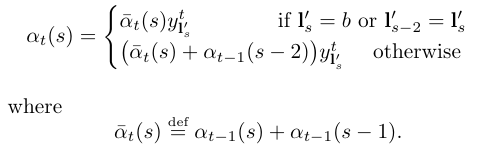

In [4]:
%matplotlib inline
from IPython.display import Image
Image('Images/Forward recursion.png')

#### The above equations is for recursively finding the values of α_t(s).
#### If the label is blank or it is the last real label, then the α_t(s) is calculated as the first line's equation.
#### If the label is not the two mentioned above, then the α_t(s) is calculated from the second line's equation.
#### Similarly, the values of β_t(s) is calculated as below.

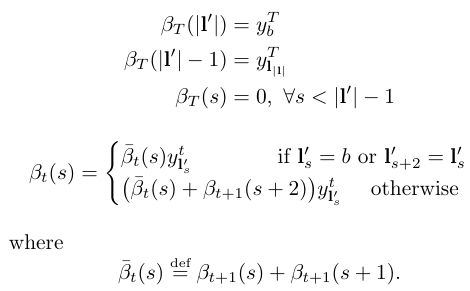

In [6]:
%matplotlib inline
from IPython.display import Image
Image('Images/Backward recursion.png')

#### All remains the same as Forward Initialization and Recursion with only difference being instead of calculating from t-1, t-2, ..., 1 as in the case of Forward Variables. We calculate using t+1, t+2, ..., T.


#### Calculating α, β in the above manner will lead to underflow, meaning, the values become so small it is close to 0 and will have no meaningful impact on the decoding. Hence, both the α, β are scaled.

# Maximum Likelihood Training
#### The goalof the Maximum Likelihood training is to simultaneously maximize the log probabilities of all correctlabel sequences in the training set. 

### The Objective Function

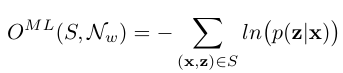

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/objective function.png')

#### S is the training set of input target sequence pairs (x, z).
#### N_w is the neural network with weight vector w.
#### p(z|x) is the conditional probability  of target sequence z given the input x.
#### The objective function represents the total negative log-likelihood across all training examples.

### Gradient Computing Framework

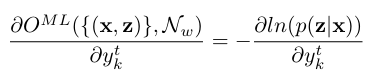

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('Images/gradient computing framework.png')

#### y_t^k is the network output probability for label k at time t.

#### Differentiate the objective function with respect to the neural network outputs to train the network with gradient descent.

### Forward-Backward Integration
#### The product of forwards and backward variables is given by:

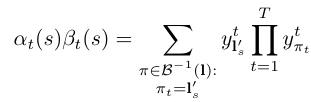

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/forward-backward product.png')

#### Rearranging, we get:

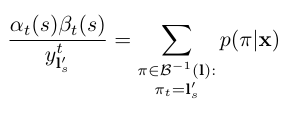

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/forward-backward product rearranged.png')

#### This represents that the total probability p(l|x) contributed by paths passing through sumbol l'_s at time t.

### Probability Decomposition
#### By summing over all positions x, the total probability is expressed as:

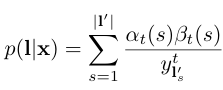

In [5]:
%matplotlib inline
from IPython.display import Image
Image('Images/probability decomposition.png')

#### The equation is true for any time t, providing multiple ways yo compute the same probability.

### Derivative with respect to network outputs
#### To differentiate with respect to y_t^k, we consider only paths passing through label k at time t. This is defined as the set of positions where label k occurs in the extended sequence l'

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('Images/Derivative with Respect to Network Outputs label.png')

#### The derivative becomes:

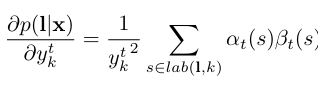

In [7]:
%matplotlib inline
from IPython.display import Image
Image('Images/Derivative with Respect to Network Outputs.png')

### Log Likelihood derivative

#### Using the chain rule for logarithmic differentiation


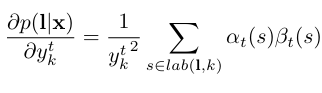

In [3]:
%matplotlib inline
from IPython.display import Image
Image('Images/log-likelihood derivate.png')

### Softmax Layer Gradient

#### For backpropagation through softmax layer, we need derivates with respect to the unnormalized outputs u_t^k. The below is the equation for error signal.

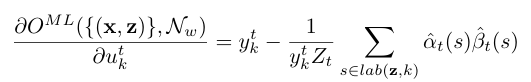

In [5]:
%matplotlib inline
from IPython.display import Image
Image('Images/softmax layer gradient.png')

#### where the normalization term Z_t is defined as:

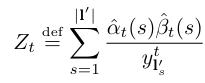

In [6]:
%matplotlib inline
from IPython.display import Image
Image('Images/normlaization term.png')

# Conclusion
#### CTC takes input sequences (like audio) and feeds them through a neural network that outputs label probabilities at each time step. It then considers all possible ways these predictions could align with the target text, sums their probabilities using the forward-backward algorithm, and learns the best alignment automatically during training.